In [3]:
import multivelo as mv

In [4]:
import scanpy as sc

In [22]:
import scipy

In [2]:
import os
import scipy
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv
import multivelo as mv
import matplotlib.pyplot as plt
import anndata as ad

In [8]:
scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.set_figure_params('scvelo')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
np.set_printoptions(suppress=True)

In [56]:
sample= ["M1-1","M1-2","M1-3","M1-4","M1-5","M1-6","M1-7","M1-8","M1-9","M1-10",
         "M2-1","M2-2","M2-3","M2-4","M2-5","M2-6","M2-7","M2-8","M2-9","M2-10",
         "M3-1","M3-2","M3-3","M3-4","M3-5","M3-6","M3-7","M3-8","M3-9","M3-10",
         "M5-1","M5-2","M5-3","M5-4","M5-5","M5-6","M5-7","M5-8","M5-9","M5-10"]
adata_rna_list=[]

for x in range(len(sample)):
 target=sample[x]
 print(target) 
 atac_path = '/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/' + target + '/outs/filtered_feature_bc_matrix'
 atac_annot_path = '/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/' + target + '/outs/atac_peak_annotation.tsv'
 feature_linkage_path = '/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/' + target + '/outs/analysis/feature_linkage/feature_linkage.bedpe'
 loom_path = '/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/' + target + '/velocyto/' + target + '.loom'
 annot_path = '/public/users/wangrong/home/wangrong/results/new_revision/momo.metadata.csv'


 adata_rna = scv.read(loom_path, cache=True)
 adata_rna.obs_names = [x.replace(':', '_')[:-1] + '-1' for x in adata_rna.obs_names]  # 加上'-1'后缀
 adata_rna.var_names_make_unique()
 
 cell_annot = pd.read_csv(annot_path, sep=',', index_col=0)
 cell_annot_1= cell_annot[cell_annot["sample.1"] == target]
 cell_annot_1['rna_index']= cell_annot_1['sample.1'] + "_" + cell_annot_1['id']
 shared_cells = pd.Index(np.intersect1d(adata_rna.obs_names, cell_annot_1['rna_index']))
 adata_rna = adata_rna[shared_cells, ]
 adata_rna
 #print(cell_annot.head())
 cell_annot_1.index
 shared_cells

 cell_annot_1.index= cell_annot_1['rna_index']
 cell_annot_2 = cell_annot_1.loc[shared_cells]
 adata_rna.obs['celltype'] = cell_annot_2['celltype']
 adata_rna.obs['sample.1'] = cell_annot_2['sample.1']
 adata_rna.obs['timepoint'] = cell_annot_2['timepoint']
 adata_rna.obs['dose'] = cell_annot_2['dose']

 print(adata_rna)
 adata_rna_list.append(adata_rna)

all_adata_rna=ad.concat(adata_rna_list,merge = "same")
all_adata_rna
all_adata_rna.write("/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/2.14.all_adata_rna.h5ad")

M1-1
AnnData object with n_obs × n_vars = 950 × 36601
    obs: 'celltype', 'sample.1', 'timepoint', 'dose'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
M1-2
AnnData object with n_obs × n_vars = 1302 × 36601
    obs: 'celltype', 'sample.1', 'timepoint', 'dose'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
M1-3
AnnData object with n_obs × n_vars = 445 × 36601
    obs: 'celltype', 'sample.1', 'timepoint', 'dose'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
M1-4
AnnData object with n_obs × n_vars = 1052 × 36601
    obs: 'celltype', 'sample.1', 'timepoint', 'dose'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'
M1-5
AnnData object with n_obs × n_vars = 815 × 36601
    obs: 'celltype', 'sample.1', 'timepo

In [4]:
shared_cells = pd.Index(np.intersect1d(all_adata_rna.obs_names, all_adata_atac.obs_names))
shared_genes = pd.Index(np.intersect1d(all_adata_rna.var_names, all_adata_atac.var_names))
print(len(shared_cells), len(shared_genes))

In [37]:
all_adata_rna=ad.concat(adata_rna_list,merge = "same")
all_adata_rna
all_rna = all_adata_rna[shared_cells, shared_genes]
all_atac = all_adata_atac[shared_cells]

M1-1


In [57]:
scv.pp.normalize_per_cell(all_rna)
scv.pp.log1p(all_rna)
scv.pp.moments(all_rna, n_pcs=30, n_neighbors=30)

AnnData object with n_obs × n_vars = 21154 × 36601
    obs: 'celltype', 'sample.1', 'timepoint', 'dose'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [11]:
all_rna.obs['celltype'] = all_rna.obs['celltype'].astype('category')

AnnData object with n_obs × n_vars = 402220 × 16029
    obs: 'n_counts'

In [58]:
import mudata as md
mdata = md.read("/public/users/huhuajie/projects/scMultiomics/Myeloid/results/Myedata_05_annotation_all.h5mu")

20175 16029


In [72]:
shared_cells = [x.replace('_', ':') for x in shared_cells]
mu_mdata=mdata[shared_cells]

Index(['M2-1_AAACAGCCATGAAATG-1', 'M2-1_AAACAGCCATTAAAGG-1',
       'M2-1_AAACAGCCATTGTCAG-1', 'M2-1_AAACATGCAATAATCC-1',
       'M2-1_AAACATGCAATGCCTA-1', 'M2-1_AAACATGCATGTTGTG-1',
       'M2-1_AAACATGCATTGTCAG-1', 'M2-1_AAACCAACAAATTGCT-1',
       'M2-1_AAACCAACAATGCGCT-1', 'M2-1_AAACCAACAATTGAGA-1',
       ...
       'M5-10_TTTGTGTTCATCACTT-1', 'M5-10_TTTGTGTTCATGCATA-1',
       'M5-10_TTTGTGTTCATTTGTC-1', 'M5-10_TTTGTTGGTAACCACA-1',
       'M5-10_TTTGTTGGTAATGACT-1', 'M5-10_TTTGTTGGTGTGCAAC-1',
       'M5-10_TTTGTTGGTGTTGTAG-1', 'M5-10_TTTGTTGGTTACATCC-1',
       'M5-10_TTTGTTGGTTAGAGCC-1', 'M5-10_TTTGTTGGTTCCTGTG-1'],
      dtype='object', length=402220)

In [17]:
all_rna.obsm['X_umap']=mu_mdata.obsm['X_mofa_umap']

In [20]:
scv.pl.umap(all_rna, color='celltype')

M2-4     1681
M5-2     1617
M2-1     1471
M1-2     1302
M1-4     1052
M3-5     1034
M1-1      950
M5-3      880
M1-5      815
M5-1      804
M3-4      697
M3-9      623
M2-2      615
M5-4      612
M2-5      547
M2-3      539
M1-3      445
M3-10     429
M5-8      423
M1-10     388
M5-10     382
M2-9      372
M5-9      344
M3-8      342
M1-9      323
M5-5      268
M1-8      243
M1-7      228
M1-6      219
M2-8      215
M3-6      196
M3-3      146
M2-7      143
M3-2      141
M5-7      134
M5-6      132
M3-7      113
M2-10     101
M2-6       95
M3-1       93
Name: sample.1, dtype: int64


In [39]:
nn_idx = np.loadtxt("/public/users/wangrong/home/wangrong/results/new_revision/nn_idx.txt", delimiter=',')
nn_dist = np.loadtxt("/public/users/wangrong/home/wangrong/results/new_revision/nn_dist.txt", delimiter=',')
nn_cells = pd.Index(pd.read_csv("/public/users/wangrong/home/wangrong/results/new_revision/nn_cells.txt", header=None)[0])

In [40]:
np.all(nn_cells == all_atac.obs_names)

Index(['M1-1_AAAGCGGGTGTTTCAC-1', 'M1-1_AAAGCCCGTGGGAACA-1',
       'M1-1_AAACCGCGTTCGGTAA-1', 'M1-1_AAAGCACCACAGCCTG-1',
       'M1-1_AAAGCCGCAAATACCT-1', 'M1-1_AAAGCTTGTTAATGAC-1',
       'M1-1_AAACCGCGTATGGTGC-1', 'M1-1_AAACATGCAGTAGGAT-1',
       'M1-1_AAACGCGCATTCCTCG-1', 'M1-1_AAAGGTTAGTGAGAGC-1',
       ...
       'M1-1_TTTGGTGCATCAGCAC-1', 'M1-1_TTTGTGGCACGGTACT-1',
       'M1-1_TTTGCATTCCTAAGGT-1', 'M1-1_TTTGTGGCAGGACACA-1',
       'M1-1_TTTGACTTCCAGGTTG-1', 'M1-1_TTTGCGACAAAGCGGC-1',
       'M1-1_TTTGACCGTGAGCGAA-1', 'M1-1_TTTGGCTGTGTGCAAC-1',
       'M1-1_TTTGGCTGTGGAGCAA-1', 'M1-1_TTTCTTGCAAACATAG-1'],
      dtype='object', length=10275)

In [ ]:
mv.knn_smooth_chrom(all_atac, nn_idx, nn_dist)

In [43]:
adata_atac

View of AnnData object with n_obs × n_vars = 950 × 36601
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [70]:
adata_result = mv.recover_dynamics_chrom(all_rna,
                                         all_atac,
                                         max_iter=5,
                                         init_mode="invert",
                                         parallel=True,
                                         save_plot=False,
                                         rna_only=False,
                                         fit=True,
                                         n_anchors=500,
                                         extra_color_key='celltype')

orig.ident  nCount_rna  nFeature_rna  \
AAACCGGCATGAGCAG-1__M1-1   SeuratProject        2581          1411   
AAACGGATCATTAGCA-1__M1-1   SeuratProject        3168          1641   
AAACGTACATAGCGAG-1__M1-1   SeuratProject        6008          2329   
AAAGCACCAAGCCAGA-1__M1-1   SeuratProject        6325          2331   
AAAGGACGTCTTGCAT-1__M1-1   SeuratProject        3798          1651   
...                                  ...         ...           ...   
TTTCTTGCAGGATGGC-1__M5-10  SeuratProject        2057          1136   
TTTGACCGTAACCTAG-1__M5-10  SeuratProject        3069          1365   
TTTGAGTCACTAGGTC-1__M5-10  SeuratProject        2645          1450   
TTTGTGAAGCGCTCAA-1__M5-10  SeuratProject        2700          1374   
TTTGTTGGTGTTGTAG-1__M5-10  SeuratProject        3227          1560   

                           nCount_atac  nFeature_atac  n_genes_by_counts  \
AAACCGGCATGAGCAG-1__M1-1          3746           3381               1411   
AAACGGATCATTAGCA-1__M1-1          3611           3346               1641   
AAACGTACATAGCGAG-1__M1-1          2056           1883               2329   
AAAGCACCAAGCCAGA-1__M1-1          4372           3909               2331   
AAAGGACGTCTTGCAT-1__M1-1          5499           4912               1651   
...                                ...            ...                ...   
TTTCTTGCAGGATGGC-1__M5-10         4200           3773               1136   
TTTGACCGTAACCTAG-1__M5-10        10027           8203               1365   
TTTGAGTCACTAGGTC-1__M5-10         2191           2075               1450   
TTTGTGAAGCGCTCAA-1__M5-10         7738           6626               1374   
TTTGTTGGTGTTGTAG-1__M5-10         9596           7961               1560   

                           log1p_n_genes_by_counts  total_counts  \
AAACCGGCATGAGCAG-1__M1-1                  7.252762          2581   
AAACGGATCATTAGCA-1__M1-1                  7.403670          3168   
AAACGTACATAGCGAG-1__M1-1                  7.753624          6008   
AAAGCACCAAGCCAGA-1__M1-1                  7.754482          6325   
AAAGGACGTCTTGCAT-1__M1-1                  7.409742          3798   
...                                            ...           ...   
TTTCTTGCAGGATGGC-1__M5-10                 7.036148          2057   
TTTGACCGTAACCTAG-1__M5-10                 7.219642          3069   
TTTGAGTCACTAGGTC-1__M5-10                 7.280008          2645   
TTTGTGAAGCGCTCAA-1__M5-10                 7.226209          2700   
TTTGTTGGTGTTGTAG-1__M5-10                 7.353082          3227   

                           log1p_total_counts  pct_counts_in_top_50_genes  \
AAACCGGCATGAGCAG-1__M1-1             7.856319                   19.798528   
AAACGGATCATTAGCA-1__M1-1             8.061172                   24.021465   
AAACGTACATAGCGAG-1__M1-1             8.701014                   27.962716   
AAAGCACCAAGCCAGA-1__M1-1             8.752423                   24.774704   
AAAGGACGTCTTGCAT-1__M1-1             8.242493                   29.620853   
...                                       ...                         ...   
TTTCTTGCAGGATGGC-1__M5-10            7.629490                   27.661643   
TTTGACCGTAACCTAG-1__M5-10            8.029433                   27.403063   
TTTGAGTCACTAGGTC-1__M5-10            7.880805                   21.625709   
TTTGTGAAGCGCTCAA-1__M5-10            7.901377                   29.185185   
TTTGTTGGTGTTGTAG-1__M5-10            8.079618                   29.129222   

                           pct_counts_in_top_100_genes  \
AAACCGGCATGAGCAG-1__M1-1                     28.167377   
AAACGGATCATTAGCA-1__M1-1                     31.597222   
AAACGTACATAGCGAG-1__M1-1                     34.553928   
AAAGCACCAAGCCAGA-1__M1-1                     32.616601   
AAAGGACGTCTTGCAT-1__M1-1                     37.730384   
...                                                ...   
TTTCTTGCAGGATGGC-1__M5-10                    36.655323   
TTTGACCGTAACCTAG-1__M5-10                    36.591724   
TTTGAGTCACTA

In [32]:
adata_result.write("/public/users/wangrong/home/wangrong/results/new_revision/2.18.mono.multivelo_result.h5ad")

array([], dtype=object)

In [5]:
adata_result = sc.read_h5ad("/public/users/wangrong/home/wangrong/results/new_revision/2.18.mono.multivelo_result.h5ad")

In [36]:
adata_result

AnnData object with n_obs × n_vars = 20175 × 9574
    obs: 'celltype', 'sample.1', 'timepoint', 'dose', 'n_counts', 'velo_s_norm_self_transition', 'root_cells', 'end_points', 'velo_s_norm_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'fit_alpha_c', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_sw1', 'fit_t_sw2', 'fit_t_sw3', 'fit_scale_cc', 'fit_rescale_c', 'fit_rescale_u', 'fit_alignment_scaling', 'fit_model', 'fit_direction', 'fit_loss', 'fit_likelihood', 'fit_likelihood_c', 'fit_ssd_c', 'fit_var_c', 'fit_c0', 'fit_u0', 'fit_s0', 'fit_anchor_min_idx', 'fit_anchor_max_idx', 'fit_anchor_velo_min_idx', 'fit_anchor_velo_max_idx', 'velo_s_genes', 'velo_u_genes', 'velo_chrom_genes', 'velo_s_norm_genes'
    uns: 'celltype_colors', 'neighbors', 'pca', 'velo_chrom_params', 'velo_s_params', 'velo_u_params', 'velo_s_norm_params', 'velo_s_norm_graph', 'velo_s_norm_graph_neg'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs', 'fit_anchor_c', 

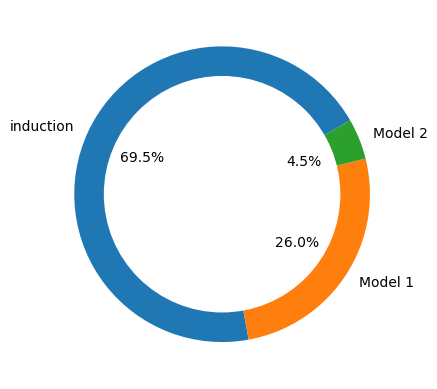

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
plt.rcParams['svg.fonttype'] = 'none'
mv.pie_summary(adata_result)
fig = plt.gcf()

# 保存图片
fig.savefig('/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/pie_summary.svg')

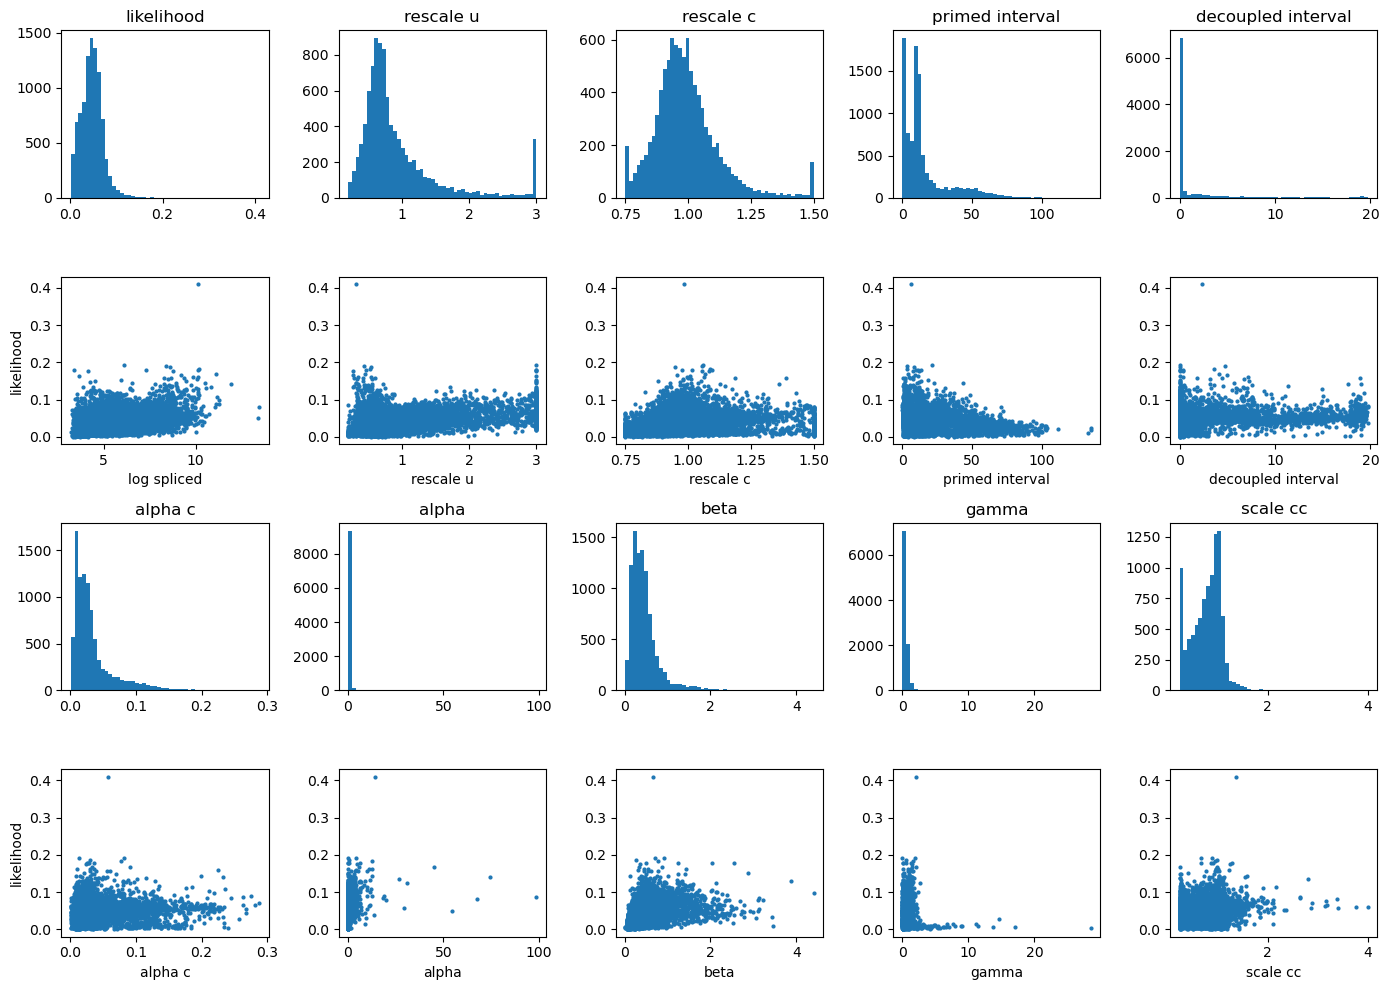

In [7]:
mv.likelihood_plot(adata_result)

In [8]:
mv.velocity_graph(adata_result)
mv.latent_time(adata_result)

computing velocity graph (using 1/112 cores)


  0%|          | 0/20175 [00:00<?, ?cells/s]

    finished (0:08:05) --> added 
    'velo_s_norm_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 0 region of root cells and 1 region of end points .
    finished (0:00:03) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:07) --> added 
    'latent_time', shared time (adata.obs)


saving figure to file /public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/velocity_stream.svg


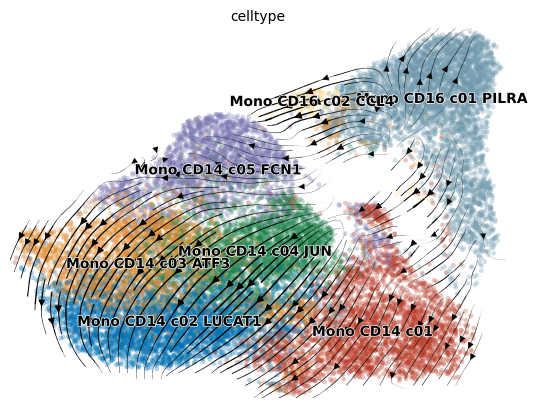

In [11]:
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
plt.rcParams['svg.fonttype'] = 'none'
mv.velocity_embedding_stream(adata_result, basis='umap',palette=["#BC3C29FF", "#0072B5FF" ,"#E18727FF" ,"#20854EFF", "#7876B1FF", "#6F99ADFF" ,"#FFDC91FF"] ,color='celltype',save="/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/velocity_stream.svg")



saving figure to file /public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/pl.scatter.pdf


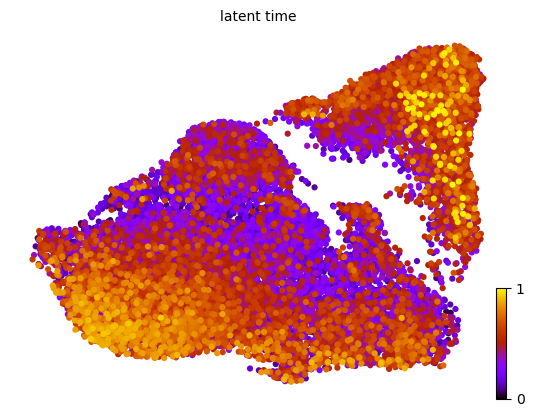

In [21]:
scv.pl.scatter(adata_result, color='latent_time', color_map='gnuplot', size=80,save="/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/pl.scatter.pdf")


calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)
saving figure to file /public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/score_genes_cell_cycle.pdf


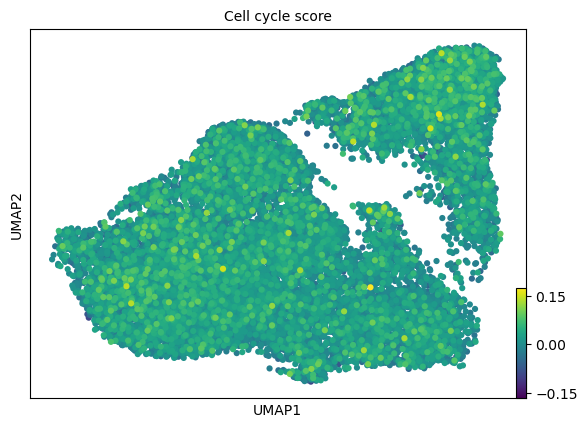

In [23]:
gcc_result = scv.tl.score_genes_cell_cycle(adata_result, copy=True)
scv.pl.scatter(gcc_result, color='G2M_score - S_score', size=80, frameon=True, title="Cell cycle score",save="/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/score_genes_cell_cycle.pdf")

In [12]:

# get the model 1 genes
adata1 = adata_result[:, adata_result.var['fit_model'].values == 1]

# get the model 2 genes
adata2 = adata_result[:, adata_result.var['fit_model'].values == 2]

saving figure to file /public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/M1.heatmap.svg


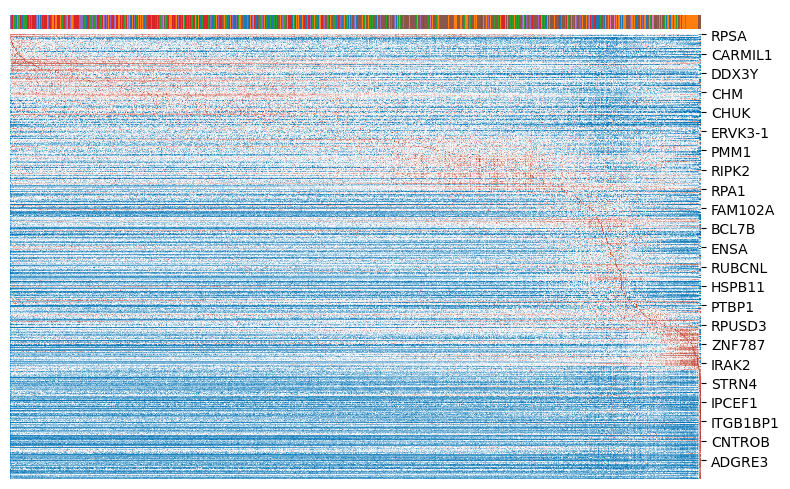

saving figure to file /public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/M2.heatmap.svg


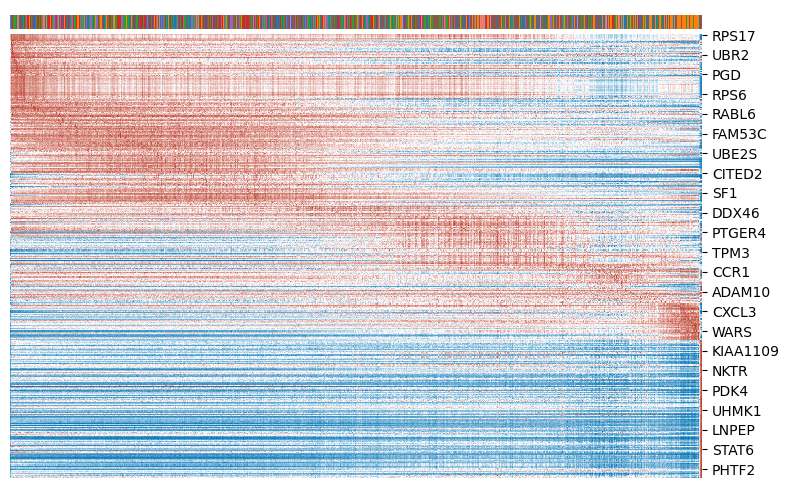

In [13]:
# heatmaps!
import matplotlib.pyplot as plt
from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
clist=["#0072B5FF","white","#BC3C29FF"]
newcmp = LinearSegmentedColormap.from_list('wang',clist)

from matplotlib.colors import ListedColormap,LinearSegmentedColormap
plt.rcParams['svg.fonttype'] = 'none'

scv.pl.heatmap(adata1, var_names=adata1.var_names, col_color='celltype', figsize=(8, 5),save="/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/M1.heatmap.svg",color_map=newcmp,palette =["#BC3C29FF", "#0072B5FF" ,"#E18727FF" ,"#20854EFF", "#7876B1FF", "#6F99ADFF" ,"#FFDC91FF"])
scv.pl.heatmap(adata2, var_names=adata2.var_names, col_color='celltype', figsize=(8, 5),save="/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/M2.heatmap.svg",color_map=newcmp,palette =["#BC3C29FF", "#0072B5FF" ,"#E18727FF" ,"#20854EFF", "#7876B1FF", "#6F99ADFF" ,"#FFDC91FF"])

In [10]:
m1=adata1.var_names
m1
m1.to_frame().to_csv('/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/m1_gene.txt', header=False, index=False)

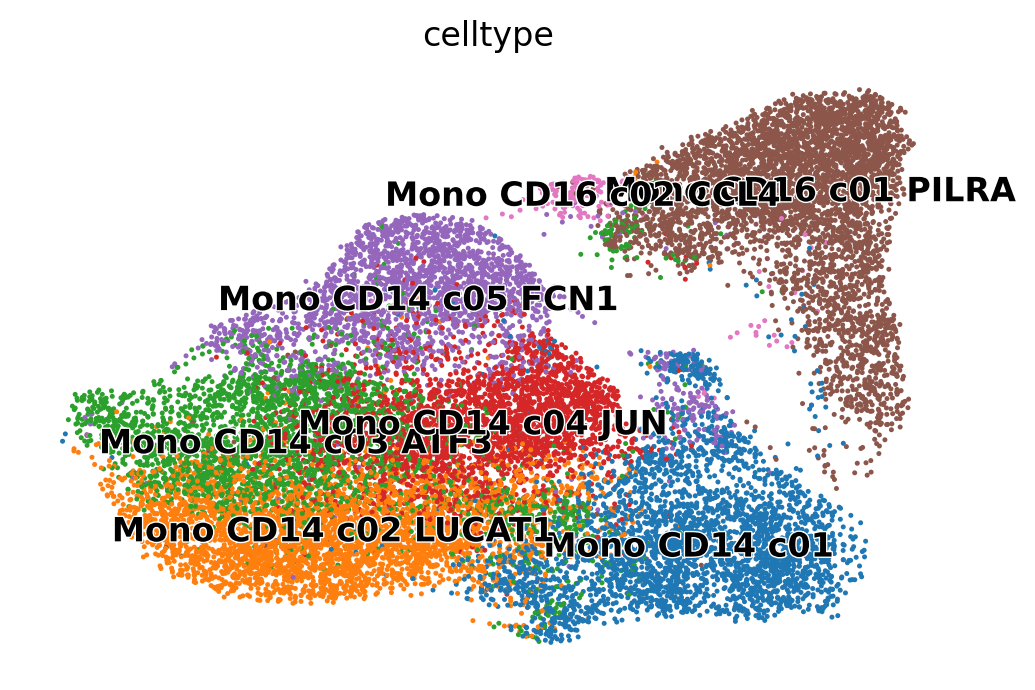

In [165]:
scv.pl.umap(all_rna, color='celltype')

In [69]:
all_rna.obs_names.to_frame().to_csv('/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/2.15.all.mono_filter.txt', header=False, index=False)

In [11]:
m2=adata2.var_names
m2
m2.to_frame().to_csv('/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/m2_gene.txt', header=False, index=False)

In [74]:
np.all(nn_cells == all_rna.obs_names)
mv.knn_smooth_chrom(all_atac, nn_idx, nn_dist)
all_atac

AnnData object with n_obs × n_vars = 20175 × 16029
    obs: 'n_counts'
    layers: 'Mc'
    obsp: 'connectivities'

In [ ]:
adata_result = mv.recover_dynamics_chrom(all_rna,
                                         all_atac,
                                         max_iter=5,
                                         init_mode="invert",
                                         parallel=True,
                                         save_plot=False,
                                         rna_only=False,
                                         fit=True,
                                         n_anchors=500,
                                         extra_color_key='celltype')

/public/users/wangrong/.conda/envs/multi/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/16029 [00:00<?, ?it/s]

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


In [104]:
all_rna.var

Accession Chromosome        End      Start Strand  \
Gene                                                                   
A1BG-AS1     ENSG00000268895         19   58355455   58347718      +   
A4GALT       ENSG00000128274         22   42721298   42692121      -   
AAAS         ENSG00000094914         12   53324864   53307456      -   
AACS         ENSG00000081760         12  125143333  125065434      +   
AAGAB        ENSG00000103591         15   67255195   67200667      -   
...                      ...        ...        ...        ...    ...   
ZYG11A       ENSG00000203995          1   52894998   52842511      +   
ZYG11B       ENSG00000162378          1   52827336   52726453      +   
ZYX          ENSG00000159840          7  143391111  143381295      +   
ZZEF1        ENSG00000074755         17    4143030    4004445      -   
hsa-mir-423  ENSG00000266919         17   30117172   30117079      -   

             gene_count_corr  
Gene                          
A1BG-AS1              0.0012  
A4GALT                   NaN  
AAAS                  0.0004  
AACS                 -0.0048  
AAGAB                 0.0172  
...                      ...  
ZYG11A               -0.0188  
ZYG11B               -0.0145  
ZYX                   0.0259  
ZZEF1                 0.0006  
hsa-mir-423              NaN  

[16029 rows x 6 columns]

In [105]:
all_atac.var

Empty DataFrame
Columns: []
Index: [LINC01409, FAM87B, LINC01128, LINC00115, FAM41C, AL645608.6, NOC2L, KLHL17, PLEKHN1, ISG15, AL645608.1, AGRN, AL645608.8, C1orf159, LINC01342, TTLL10, TNFRSF18, SDF4, B3GALT6, AL162741.1, UBE2J2, PUSL1, CPTP, INTS11, DVL1, AURKAIP1, CCNL2, MRPL20-AS1, MRPL20, VWA1, ATAD3B, ATAD3A, TMEM240, SSU72, FNDC10, MIB2, AL691432.2, CDK11B, FO704657.1, SLC35E2B, CDK11A, SLC35E2A, NADK, AL109917.1, GNB1, TMEM52, GABRD, AL391845.1, AL590822.2, FAAP20, AL590822.1, SKI, AL590822.3, MORN1, RER1, PEX10, PLCH2, PANK4, AL139246.5, TNFRSF14, PRXL2B, ARHGEF16, MEGF6, TPRG1L, AL513320.1, WRAP73, SMIM1, LRRC47, DFFB, CEP104, C1orf174, LINC01134, Z98259.2, NPHP4, KCNAB2, RPL22, RNF207, ICMT, LINC00337, GPR153, ACOT7, AL031848.2, HES2, ESPN, TNFRSF25, PLEKHG5, NOL9, ZBTB48, KLHL21, PHF13, THAP3, DNAJC11, CAMTA1, CAMTA1-DT, VAMP3, PER3, Z98884.1, PARK7, ERRFI1, AL034417.2, ...]

[16029 rows x 0 columns]

In [81]:
all_rna.obsp.keys()

KeysView(PairwiseArrays with keys: distances, connectivities)

In [ ]:
aa=np.intersect1d(all_atac.var_names, all_rna.var_names)

In [94]:
all_rna

AnnData object with n_obs × n_vars = 20175 × 16029
    obs: 'celltype', 'sample.1', 'timepoint', 'dose', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr'
    uns: 'pca', 'neighbors', 'umap', 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [108]:
all_atac.var_names&all_rna.var_names

Index(['LINC01409', 'FAM87B', 'LINC01128', 'LINC00115', 'FAM41C', 'AL645608.6',
       'NOC2L', 'KLHL17', 'PLEKHN1', 'ISG15',
       ...
       'DDX3Y', 'UTY', 'TMSB4Y', 'TTTY14', 'AC010889.2', 'KDM5D', 'TTTY10',
       'EIF1AY', 'MAFIP', 'AC145212.1'],
      dtype='object', length=16029)

In [103]:
all_atac

AnnData object with n_obs × n_vars = 20175 × 16029
    obs: 'n_counts'
    layers: 'Mc'
    obsp: 'connectivities'

In [111]:
np.all(all_rna.var_names == all_atac.var_names)

True

In [109]:
all_atac.var_names.intersection(all_rna.var_names)

Index(['LINC01409', 'FAM87B', 'LINC01128', 'LINC00115', 'FAM41C', 'AL645608.6',
       'NOC2L', 'KLHL17', 'PLEKHN1', 'ISG15',
       ...
       'DDX3Y', 'UTY', 'TMSB4Y', 'TTTY14', 'AC010889.2', 'KDM5D', 'TTTY10',
       'EIF1AY', 'MAFIP', 'AC145212.1'],
      dtype='object', length=16029)

In [110]:
all_atac.var_names=all_rna.var_names

In [9]:
adata_result.write("/public/users/wangrong/home/wangrong/results/new_revision/adata_result.multivelo_result.h5ad")

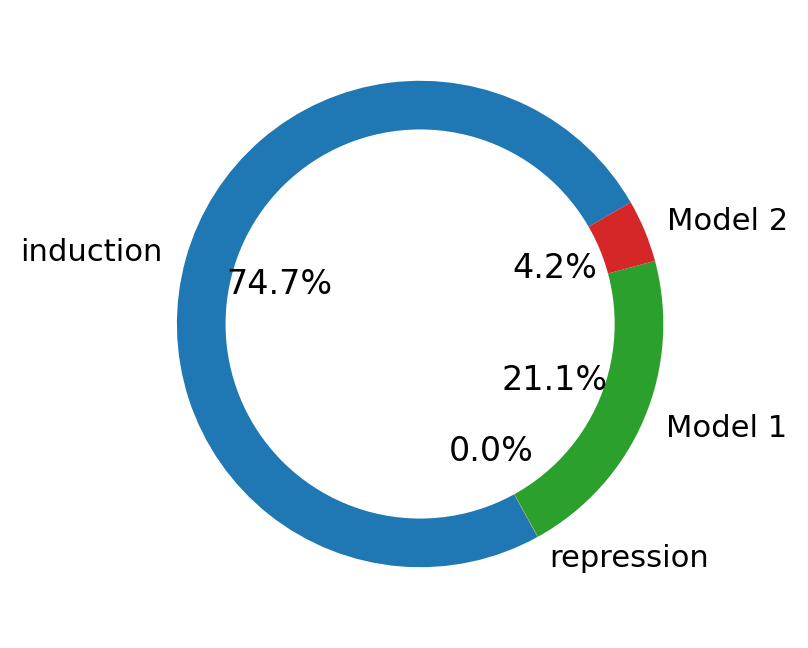

In [114]:
mv.pie_summary(adata_result)

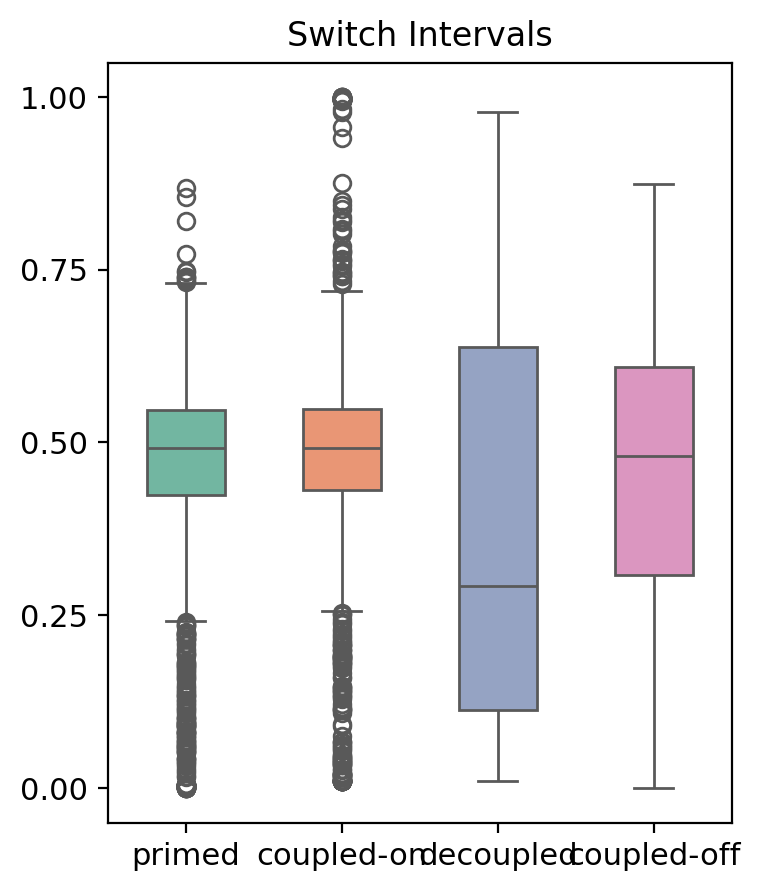

In [115]:
mv.switch_time_summary(adata_result)

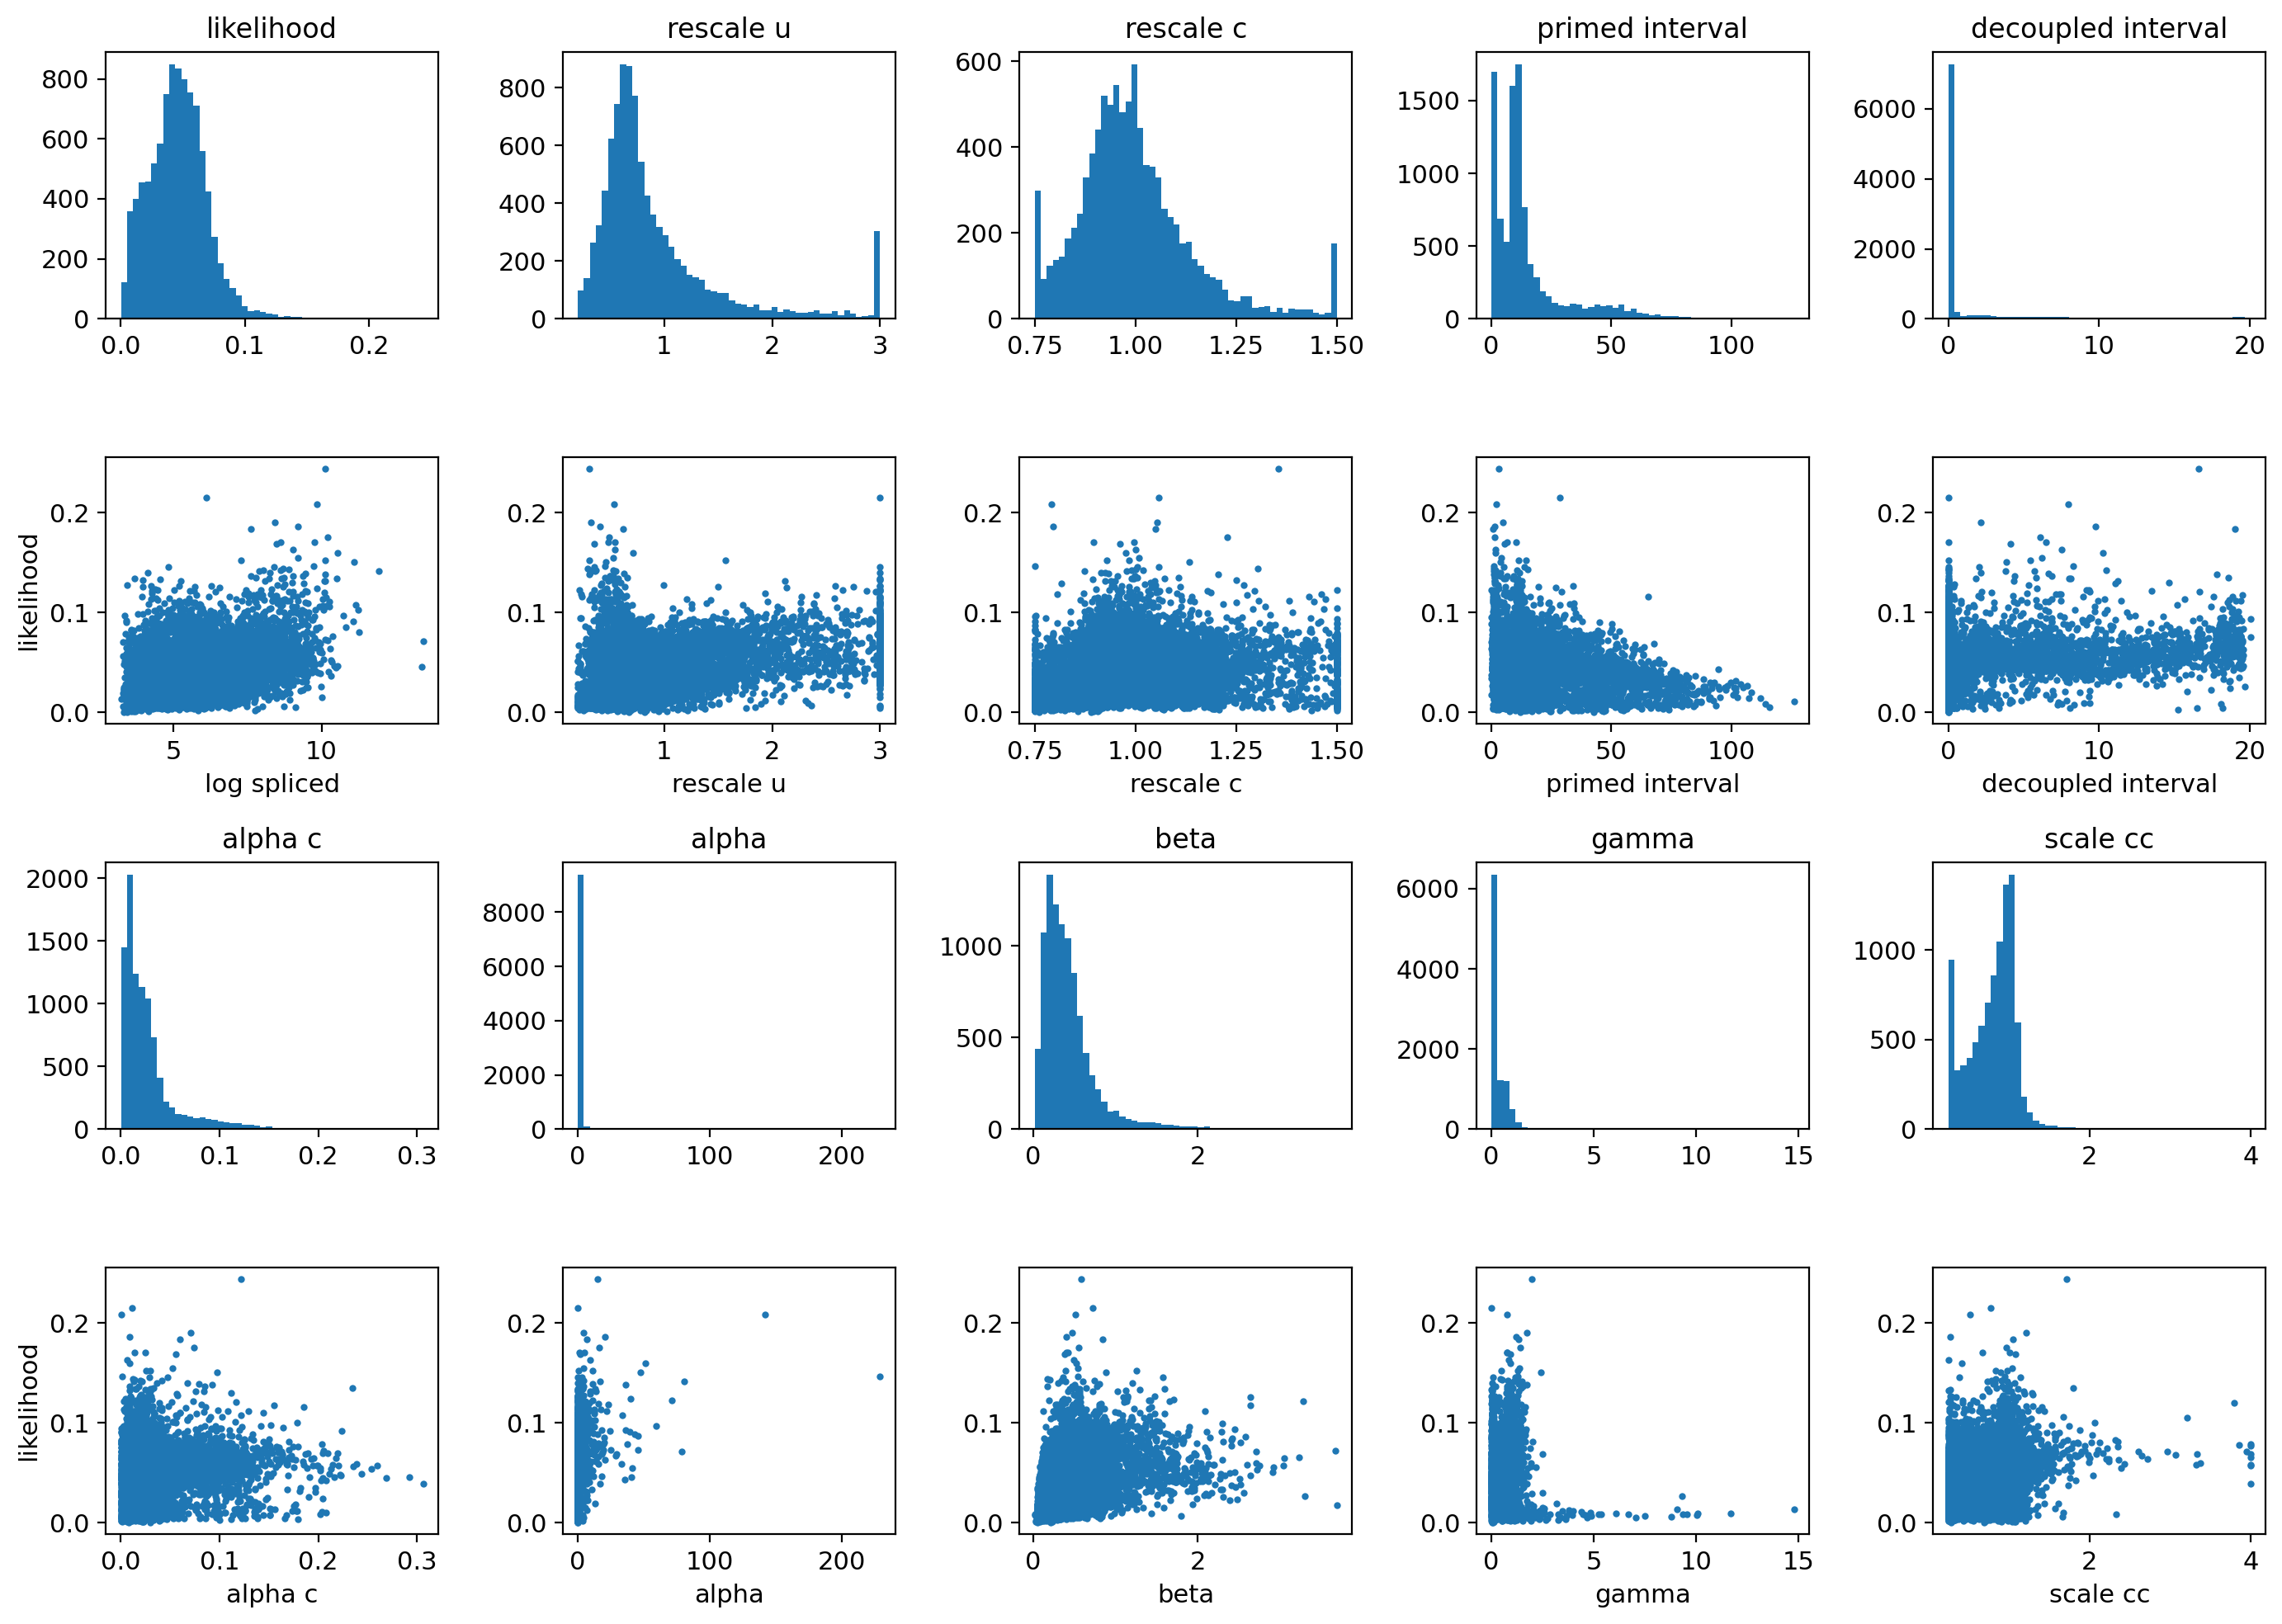

In [116]:
mv.likelihood_plot(adata_result)

In [117]:
mv.velocity_graph(adata_result)
mv.latent_time(adata_result)

computing velocity graph (using 1/112 cores)


/public/users/wangrong/.conda/envs/multi/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/20175 [00:00<?, ?cells/s]

    finished (0:08:23) --> added 
    'velo_s_norm_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 0 region of root cells and 1 region of end points .
    finished (0:00:03) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:08) --> added 
    'latent_time', shared time (adata.obs)


computing velocity embedding
    finished (0:00:04) --> added
    'velo_s_norm_umap', embedded velocity vectors (adata.obsm)


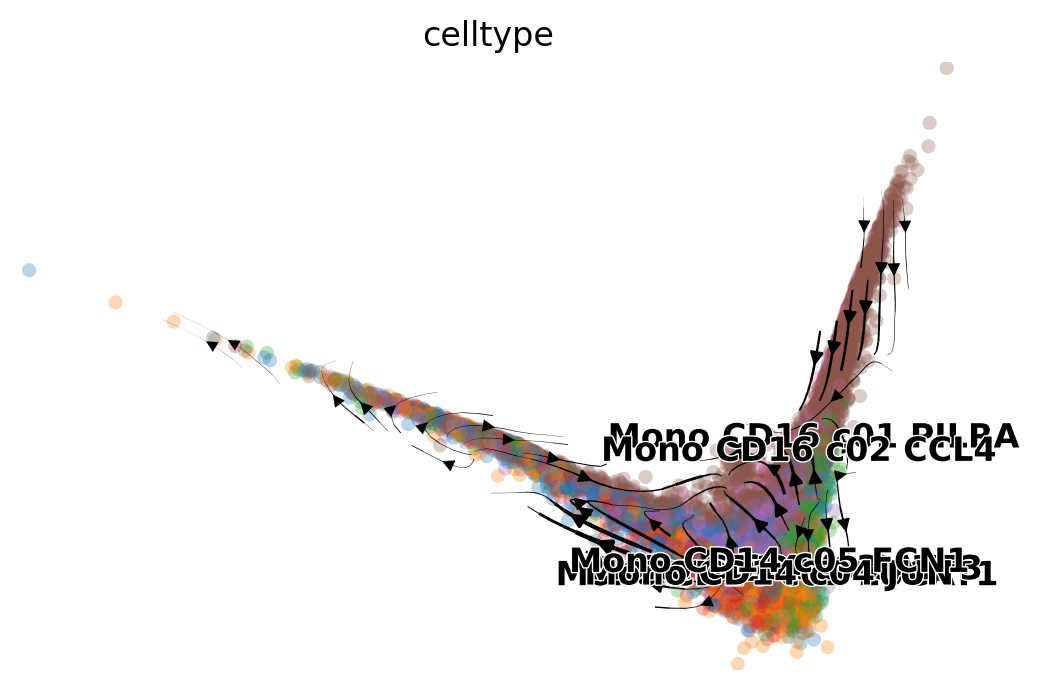

In [118]:
mv.velocity_embedding_stream(adata_result, basis='umap', color='celltype')

In [134]:
!conda install mudata

Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
 - bioconda
 - https://repo.anaconda.com/pkgs/main
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /public/software/miniconda3

  added / updated specs:
    - mudata


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2025.1.31          |  py312h06a4308_0         162 KB  defaults
    h5py-3.12.1                |  py312h5842655_1         1.4 MB  defaults
    mudata-0.3.1               |     pyhd8ed1ab_1          40 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.6 MB

The following NEW packages will be INSTALLED:

  anndata            conda-forge/noarch::anndata-0.11.3-pyhd8ed1ab_0 
  array-api-compat   conda-forge/noarch::array-api-compat-1.10.0-pyhd8ed1ab_0 
  blas         

In [137]:
import mudata as md
mdata = md.read("/public/users/huhuajie/projects/scMultiomics/Myeloid/results/Myedata_05_annotation_all.h5mu")

In [140]:
mdata

MuData object with n_obs × n_vars = 22911 × 97388
  obs:	'sample', 'leiden_joint', 'celltype', 'celltype_final'
  var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
  uns:	'celltype_colors', 'celltype_final_colors', 'leiden_joint', 'leiden_joint_colors', 'mofa', 'neighbors', 'sample_colors', 'umap'
  obsm:	'X_mofa', 'X_mofa_umap', 'X_pca_harmony', 'X_umap'
  varm:	'LFs'
  obsp:	'connectivities', 'distances'
  2 modalities
    rna:	22911 x 36601
      obs:	'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden_joint', 'celltype', 'celltype_final'
      var:	'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'hvg', 'log1p', 'scrublet'
      layers:	'counts', 'lognorm'
    atac:	22911 x 60787
      obs:	'sample', 'leiden', 'leiden_joint', 'celltype', 'celltype_final'
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'hvg', 'log1p'
      layers:	'counts', 'lognorm'

In [143]:
shared_cells = [x.replace('_', ':') for x in shared_cells]

In [145]:
mu_mdata=mdata[shared_cells]

In [149]:
type(mu_mdata.obsm['X_mofa_umap'])

anndata._core.views.ArrayView

In [152]:
type(all_rna.obsm['X_umap'])

numpy.ndarray

In [153]:
df1=pd.DataFrame(mu_mdata.obsm['X_mofa_umap'])
df1

0          1
0      13.429218  16.119322
1      12.465339   7.231680
2       7.157489  10.630203
3       9.889295   6.205346
4       3.667188   5.545271
...          ...        ...
20170  16.486713  17.420784
20171   9.465064   7.237680
20172  12.926377   6.723596
20173  11.747842  14.878760
20174   8.254536   7.171426

[20175 rows x 2 columns]

In [156]:
df2=pd.DataFrame(all_rna.obsm['X_umap'])
df2

0         1
0      8.730948  4.295791
1      7.333851  1.821981
2      8.058821  1.622090
3      8.092994  1.241453
4      8.270493  1.219090
...         ...       ...
20170  9.078977  6.223257
20171  8.006632  1.227694
20172  7.753229  1.472222
20173  8.036028  2.586722
20174  7.811337  0.937936

[20175 rows x 2 columns]

In [162]:
mu_mdata.obsm['X_mofa_umap']

ArrayView([[13.429218 , 16.119322 ],
           [12.465339 ,  7.23168  ],
           [ 7.1574893, 10.630203 ],
           ...,
           [12.926377 ,  6.7235956],
           [11.747842 , 14.87876  ],
           [ 8.254536 ,  7.171426 ]], dtype=float32)

In [164]:
all_rna.obsm['X_umap']=mu_mdata.obsm['X_mofa_umap']

In [ ]:
mv.velocity_embedding_stream(adata_result, basis='umap', color='celltype')

In [33]:
adata_result = sc.read_h5ad("/public/users/wangrong/home/wangrong/results/new_revision/2.18.mono.multivelo_result.h5ad")

In [6]:
sc.tl.leiden(adata_result)

In [31]:
mono_genes= np.mean(adata_result[adata_result.obs['celltype'] != 'Mono_CD14_c01, Mono_CD14_c02_LUCAT1, Mono_CD14_c03_ATF3, Mono_CD14_c04_JUN, Mono_CD14_c05_FCN1,Mono_CD16_c01_PILRA, Mono_CD16_c02_CCL4',:].X.A, axis=0) > np.mean(adata_result[adata_result.obs['celltype'] == 'Mono_CD14_c01, Mono_CD14_c02_LUCAT1, Mono_CD14_c03_ATF3, Mono_CD14_c04_JUN, Mono_CD14_c05_FCN1,Mono_CD16_c01_PILRA, Mono_CD16_c02_CCL4',:].X.A, axis=0)
adata_result.obs['state0 count'] = np.sum((adata_result[:,adata_result.var['velo_s_genes'] & mono_genes].layers['fit_state'] == 0), axis=1)
adata_result.obs['state1 count'] = np.sum((adata_result[:,adata_result.var['velo_s_genes'] & mono_genes].layers['fit_state'] == 1), axis=1)
adata_result.obs['state2 count'] = np.sum((adata_result[:,adata_result.var['velo_s_genes'] & mono_genes].layers['fit_state'] == 2), axis=1)
adata_result.obs['state3 count'] = np.sum((adata_result[:,adata_result.var['velo_s_genes'] & mono_genes].layers['fit_state'] == 3), axis=1)
adata_result.obs['state0 count'] /= np.max(adata_result.obs['state0 count'])
adata_result.obs['state1 count'] /= np.max(adata_result.obs['state1 count'])
adata_result.obs['state2 count'] /= np.max(adata_result.obs['state2 count'])
adata_result.obs['state3 count'] /= np.max(adata_result.obs['state3 count'])

In [ ]:
colors = ['state0 count','state1 count','state2 count','state3 count']
titles = ['Primed state count', "Coupled-on state count", "Decoupled state count", "Coupled-off state count"]

scv.pl.scatter(adata_result, color=colors, size=30, frameon=True, color_map="coolwarm", title=titles)

In [20]:
mono_genes= np.mean(adata_result[adata_result.obs['celltype'] != 'Mono_CD14_c01, Mono_CD14_c02_LUCAT1',:].X.A, axis=0) > np.mean(adata_result[adata_result.obs['celltype'] == 'Mono_CD14_c01, Mono_CD14_c02_LUCAT1',:].X.A, axis=0)

In [23]:
np.sum((adata_result[:,adata_result.var['velo_s_genes'] & mono_genes].layers['fit_state'] == 0), axis=1)

ArrayView([0, 0, 0, ..., 0, 0, 0])

In [24]:
adata_result.obs['state0 count'] = np.sum((adata_result[:,adata_result.var['velo_s_genes'] & mono_genes].layers['fit_state'] == 0), axis=1)

In [34]:
adata_result.obs

celltype sample.1 timepoint  \
M1-10_AAACAGCCACAACAAA-1   Mono_CD16_c01_PILRA    M1-10     day44   
M1-10_AAACCGAAGGTGTCCA-1  Mono_CD14_c02_LUCAT1    M1-10     day44   
M1-10_AAACCGGCACTTGTTC-1    Mono_CD14_c05_FCN1    M1-10     day44   
M1-10_AAAGCAAGTAGCAGCT-1  Mono_CD14_c02_LUCAT1    M1-10     day44   
M1-10_AAAGCACCAGGGAGGA-1  Mono_CD14_c02_LUCAT1    M1-10     day44   
...                                        ...      ...       ...   
M5-9_TTTCATCAGCTTGCTC-1    Mono_CD16_c01_PILRA     M5-9     day36   
M5-9_TTTCTCACACCAGCAT-1      Mono_CD14_c04_JUN     M5-9     day36   
M5-9_TTTGAGTCATCCGTAA-1          Mono_CD14_c01     M5-9     day36   
M5-9_TTTGTCCCATTAAACC-1     Mono_CD16_c02_CCL4     M5-9     day36   
M5-9_TTTGTTGGTATTGCAG-1     Mono_CD14_c03_ATF3     M5-9     day36   

                                 dose  n_counts  
M1-10_AAACAGCCACAACAAA-1  second_dose    1186.0  
M1-10_AAACCGAAGGTGTCCA-1  second_dose     261.0  
M1-10_AAACCGGCACTTGTTC-1  second_dose     614.0  
M1-10_AAAGCAAGTAGCAGCT-1  second_dose     497.0  
M1-10_AAAGCACCAGGGAGGA-1  second_dose     798.0  
...                               ...       ...  
M5-9_TTTCATCAGCTTGCTC-1   second_dose     785.0  
M5-9_TTTCTCACACCAGCAT-1   second_dose     519.0  
M5-9_TTTGAGTCATCCGTAA-1   second_dose     352.0  
M5-9_TTTGTCCCATTAAACC-1   second_dose     594.0  
M5-9_TTTGTTGGTATTGCAG-1   second_dose     436.0  

[20175 rows x 5 columns]

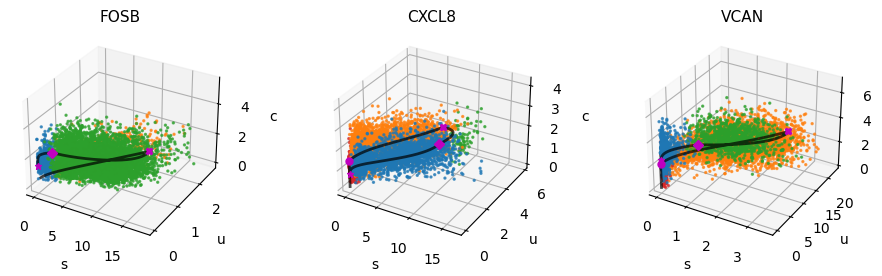

In [27]:
gene_list = ["FOSB", "CXCL8", "VCAN"]
mv.scatter_plot(adata_result, by='cus', n_cols=3, color_by='state', downsample=3, show_anchors=True, genes=gene_list)FOSB

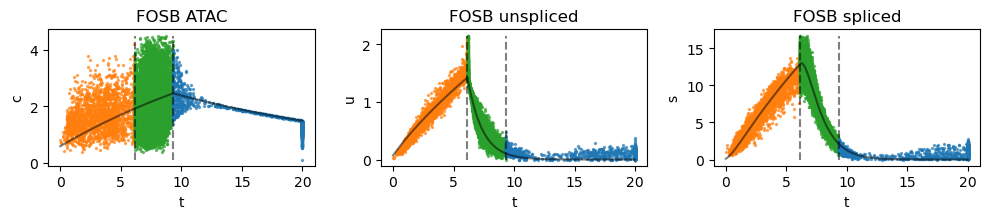

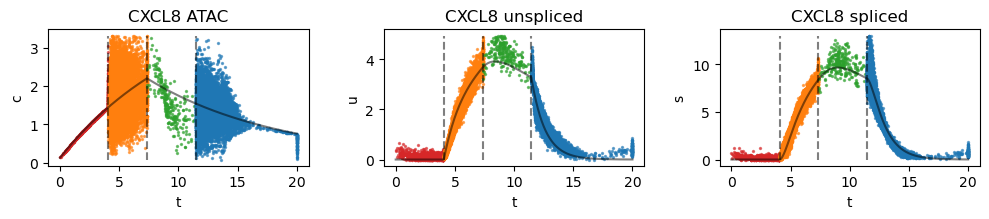

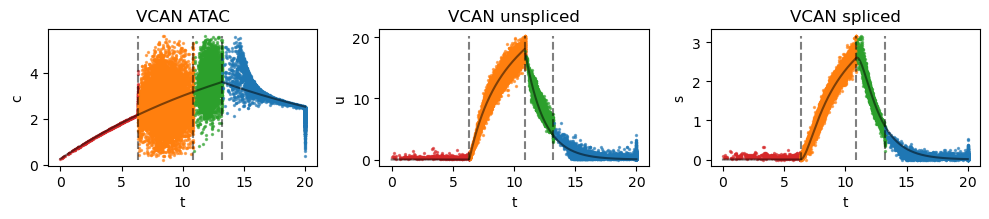

In [56]:
mv.dynamic_plot(adata_result, genes=["CCR1"], color_by="state")
fig = plt.gcf()
fig.savefig('/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/gene4.dot.png')
mv.dynamic_plot(adata_result, genes=["CXCL3"], color_by="state")
fig = plt.gcf()
fig.savefig('/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/gene5.dot.png')
mv.dynamic_plot(adata_result, genes=["VCAN"], color_by="state")
fig = plt.gcf()
fig.savefig('/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/gene3.dot.png')

In [43]:
adata_result.layers['fit_state'] == 3

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [44]:
adata_result.layers

Layers with keys: ATAC, Ms, Mu, ambiguous, fit_state, fit_t, matrix, spliced, unspliced, velo_chrom, velo_s, velo_u

In [45]:
np.sum((adata_result[:,adata_result.var['velo_s_genes'] & mono_genes].layers['fit_state'] == 1), axis=1)

ArrayView([0, 0, 0, ..., 0, 0, 0])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2eb98f83a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2eb98f9b70>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f2eb98f93c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2eb98fa0b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2eb98fa350>],
 'means': []}

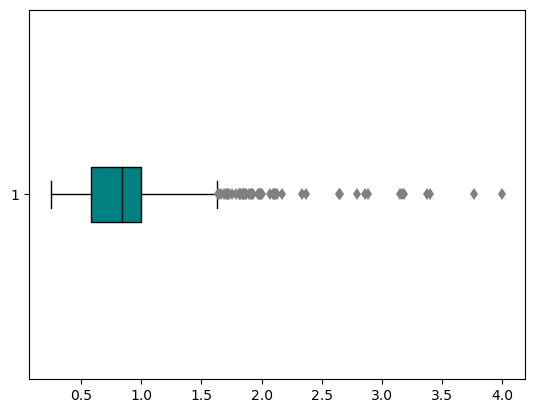

In [46]:
plt.boxplot(adata_result.var["fit_scale_cc"], vert=False, patch_artist=True,
            boxprops=dict(facecolor='teal'),
            medianprops=dict(color="black"),
            flierprops=dict(markerfacecolor='grey', marker='d', fillstyle="full", markeredgewidth=0.0))

saving figure to file /public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/JUND.feature.png


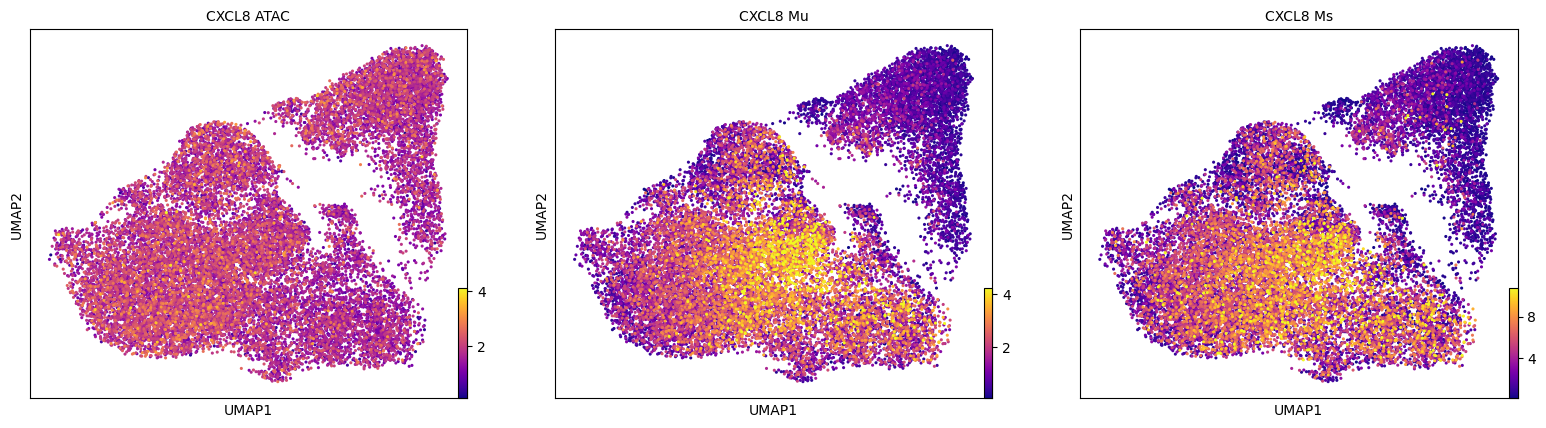

<Figure size 640x480 with 0 Axes>

In [16]:
layers = ["ATAC", "Mu", "Ms"]

gene="CXCL8"

titles = []
for layer in layers:
    titles.append(gene + " " + layer)
scv.pl.scatter(adata_result, color=gene, layer=layers, color_map="plasma", size=20, frameon=True, title=titles,save='/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/JUND.feature.png')
fig = plt.gcf()
fig.savefig('/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/CXCL8.feature.pdf')

In [48]:
adata_result[:,'FOSB'].layers['fit_state']


ArrayView([[2.],
           [2.],
           [2.],
           ...,
           [2.],
           [2.],
           [2.]])

In [49]:
adata_result.var['fit_model'].values

array([1., 1., 1., ..., 1., 1., 1.])

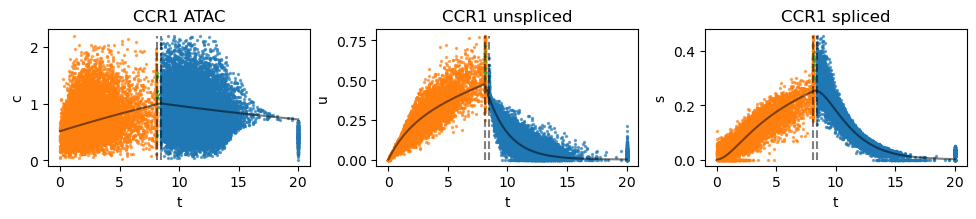

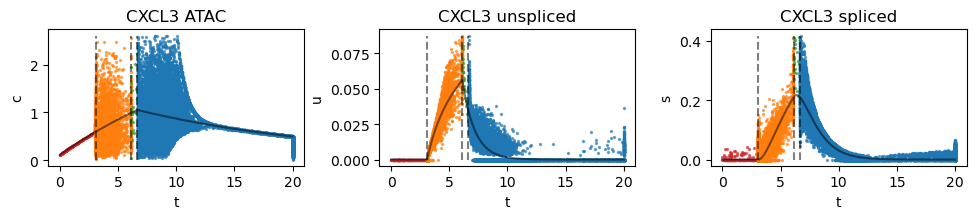

In [17]:
mv.dynamic_plot(adata_result, genes=["CCR1"], color_by="state")
fig = plt.gcf()
fig.savefig('/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/gene4.dot.png')
mv.dynamic_plot(adata_result, genes=["CXCL3"], color_by="state")
fig = plt.gcf()
fig.savefig('/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/gene5.dot.png')

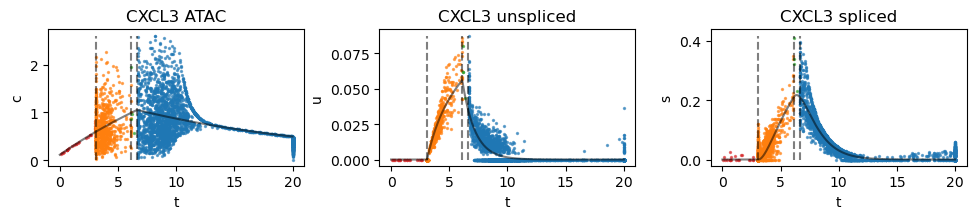

In [56]:

mv.dynamic_plot(adata_result, genes=["CXCL3"], color_by="state",downsample=6)
fig = plt.gcf()
fig.savefig('/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/CXCL3.dot.pdf')

In [19]:
adata_result.var['fit_direction']

Gene
A1BG-AS1          on
AAAS              on
AACS              on
AAGAB             on
AAMDC       complete
              ...   
ZWILCH            on
ZXDC              on
ZYG11B      complete
ZYX               on
ZZEF1       complete
Name: fit_direction, Length: 9574, dtype: category
Categories (2, object): ['complete', 'on']

In [20]:
adata=adata_result

In [21]:
genes = adata.var_names

In [23]:
fit_model = adata[:,(adata.var['fit_direction']=='complete') & np.isin(adata.var_names, genes)].var['fit_model'].values
fit_direction = adata[:,genes].var['fit_direction'].values

In [24]:
fit_direction

['on', 'on', 'on', 'on', 'complete', ..., 'on', 'on', 'complete', 'on', 'complete']
Length: 9574
Categories (2, object): ['complete', 'on']

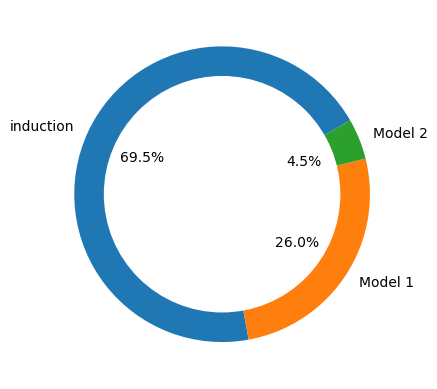

In [26]:
data = [np.sum(fit_direction == 'on'), np.sum(fit_direction == 'off'), np.sum(fit_model == 1), np.sum(fit_model == 2)]
index = ['induction', 'repression', 'Model 1', 'Model 2']
index = [x for i,x in enumerate(index) if data[i] > 0]
data = [x for x in data if x > 0]
df = pd.DataFrame({'data':data}, index=index)
df.plot.pie(y='data', autopct='%1.1f%%', legend=False, startangle=30, ylabel='')
circle = plt.Circle((0,0),0.8,fc='white')
fig=plt.gcf()
fig.gca().add_artist(circle)

In [28]:
print(data)

[6658, 2489, 427]


In [29]:
fit_model

array([1., 1., 1., ..., 1., 1., 1.])

In [32]:
adata3 = adata_result[:, adata_result.var['fit_direction'].values == 'on']
adata3.var_names.to_frame().to_csv('/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/primed_gene.txt', header=False, index=False)

In [33]:
adata3

View of AnnData object with n_obs × n_vars = 20175 × 6658
    obs: 'celltype', 'sample.1', 'timepoint', 'dose', 'n_counts', 'velo_s_norm_self_transition', 'root_cells', 'end_points', 'velo_s_norm_pseudotime', 'latent_time'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'fit_alpha_c', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_sw1', 'fit_t_sw2', 'fit_t_sw3', 'fit_scale_cc', 'fit_rescale_c', 'fit_rescale_u', 'fit_alignment_scaling', 'fit_model', 'fit_direction', 'fit_loss', 'fit_likelihood', 'fit_likelihood_c', 'fit_ssd_c', 'fit_var_c', 'fit_c0', 'fit_u0', 'fit_s0', 'fit_anchor_min_idx', 'fit_anchor_max_idx', 'fit_anchor_velo_min_idx', 'fit_anchor_velo_max_idx', 'velo_s_genes', 'velo_u_genes', 'velo_chrom_genes', 'velo_s_norm_genes'
    uns: 'celltype_colors', 'neighbors', 'pca', 'velo_chrom_params', 'velo_s_params', 'velo_u_params', 'velo_s_norm_params', 'velo_s_norm_graph', 'velo_s_norm_graph_neg'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs', 'fit_anc

saving figure to file /public/users/wangrong/home/wangrong/results/new_revision/velocity_stream3.svg


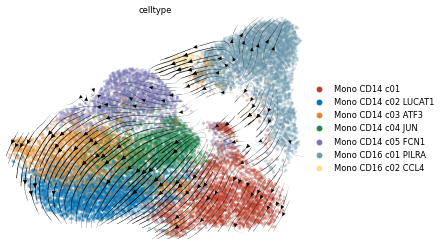

In [45]:
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
plt.rcParams['svg.fonttype'] = 'none'
mv.velocity_embedding_stream(adata_result, basis='umap',palette=["#BC3C29FF", "#0072B5FF" ,"#E18727FF" ,"#20854EFF", "#7876B1FF", "#6F99ADFF" ,"#FFDC91FF"] ,color='celltype',dpi=60,legend_loc='right margin',save="/public/users/wangrong/home/wangrong/results/new_revision/velocity_stream3.svg")

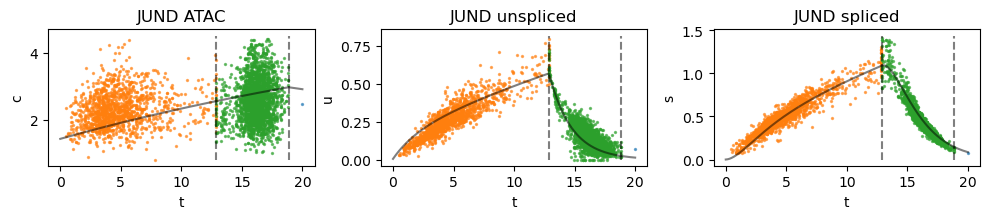

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
plt.rcParams['svg.fonttype'] = 'none'
mv.dynamic_plot(adata_result, genes=["JUND"], color_by="state",downsample=6)
fig = plt.gcf()
fig.savefig('/public/users/wangrong/database/wangrong/Results/0712_ATAC+RNA/python/JUND.dot.svg')